In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import sys
sys.path.append('../code/python')
from mpl_settings_v3 import *
from metodos import choose_solver, Qtest, QtildeTest, plus, minus, Dpm

10


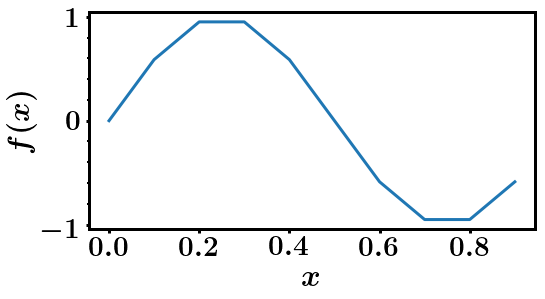

In [2]:
def f(x):
    return np.sin(2*np.pi*x) + 10*np.sin(10*np.pi*x)


h = 0.1
k = 0.1*h**2

X = np.arange(0, 1, h)
init_data = f(X)
print(init_data.size)

fig, ax = plt.subplots(figsize=(8,4))
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$f(x)$')
ax.plot(X, init_data)
plt.show()

In [17]:
def solv(h, k, a, b, f, verbose=False):
    """

    Solve the problem

        dy/dt = f(y, t) 
        y(t=a) = y0

    in interval a <= t < b, with 
    step size k using the Euler method

    """

    N = int(1/h)
    
    X = np.arange(0, 1, h)
    time = np.arange(a, b, k)
    steps = time.size
    
    v = np.zeros((N, time.size))
    print(v.size)
    v[:,0] = f(X)
    t = a
    for n, t in enumerate(time[:-1]):
        if verbose:
            count = int((10*n)/steps)
            reminder = (10*n)%steps
            if(reminder == 0):
                print(count)
        
        vn = v[:,n]
        for j in range(N):
            v[j][n+1] = vn[j] + k * Dpm(vn, j, N)
        
    return time, X, v

h = 0.01
k = 0.1*h**2

t0 = 0
T = 0.2

time,  X,  v  = solv(h, k, t0, T, f, verbose=True)
#time2, X2, v2 = solv(h/2, 0.1*(h/2)**2, t0, T, f, verbose=True)
#time3, X3, v3 = solv(h/4, 0.1*(h/4)**2, t0, T, f, verbose=True)

steps = time.size

t1 = 0.004
t2 = 0.2

t1_idx = int(t1/k)
t2_idx = int(t2/k) - 1

print(t1, t1_idx)
print(t2, t2_idx)

2000000
0
1
2
3
4
5
6
7
8
9
0.004 400
0.2 19999


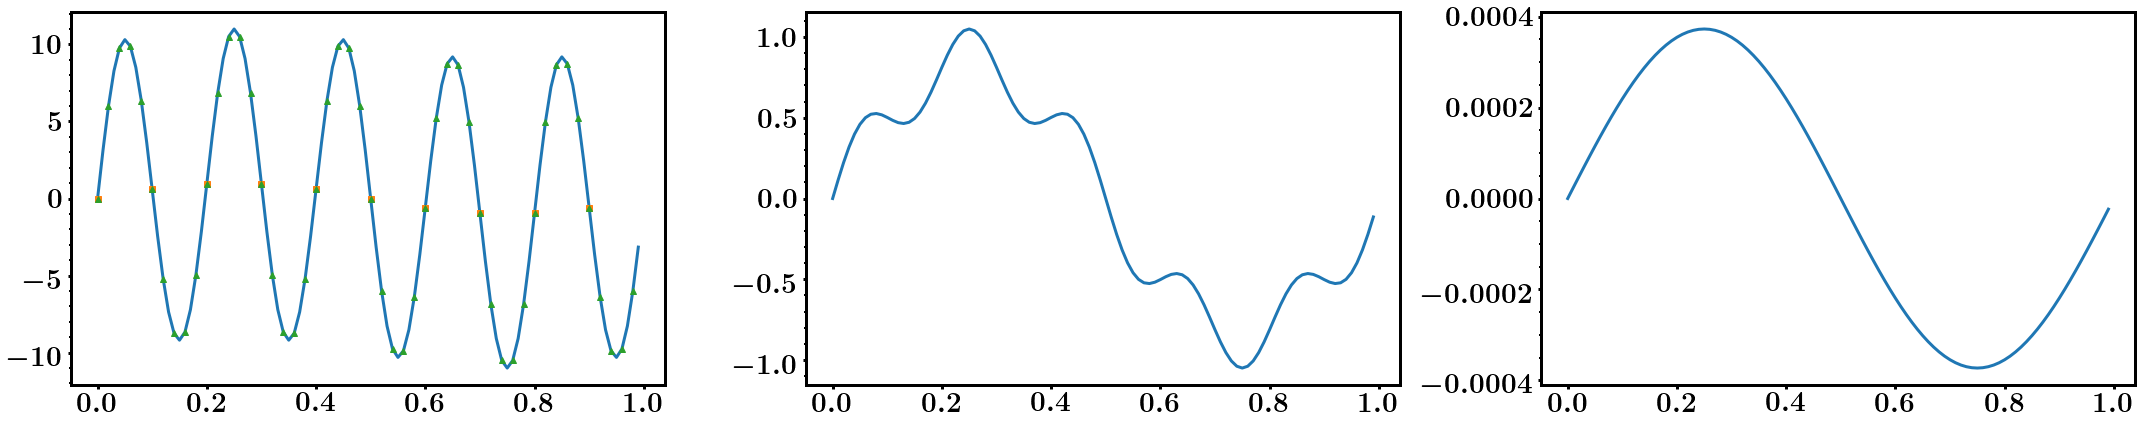

In [29]:
ncols = 3
nrows = 1
fig, axes = plt.subplots(figsize=(10*ncols, 6*nrows), ncols=ncols, nrows=nrows)

ax = axes[0]
ax.plot(X, v[:,0])
ax.plot(X[::10], f(X[::10]), 's')
ax.plot(X[::2], f(X[::2]), '^')

ax = axes[1]
ax.plot(X, v[:,t1_idx])

ax = axes[2]
ax.plot(X, v[:,t2_idx])

plt.tight_layout()
plt.show()

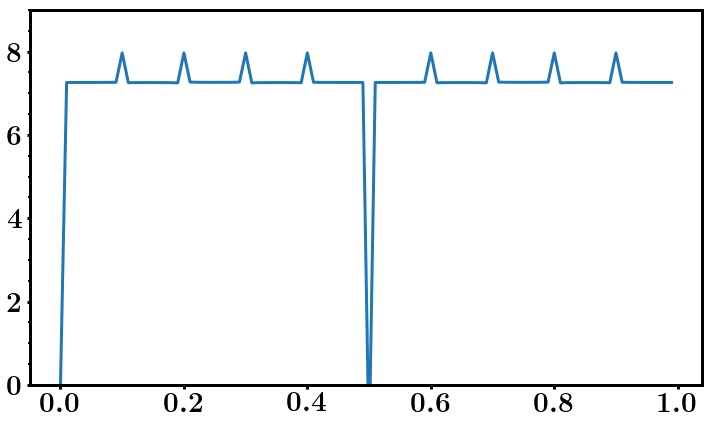

In [81]:
t_Q = 0.2
t_idx = int(t_Q/h)
t2_idx = int(2*t_Q/h)
t3_idx = int(4*t_Q/h)

vn = v[:,t_idx]
v2n = v2[:,t2_idx]
v3n = v3[:,t3_idx]

num   = vn - v2n[::2]
denom = (v2n - v3n[::2])[::2]

Q = num / denom

ncols = 1
nrows = 1
fig, axes = plt.subplots(figsize=(10*ncols, 6*nrows), ncols=ncols, nrows=nrows)

ax = axes
ax.set_ylim(0, 9)
ax.plot(X, Q)

plt.tight_layout()
plt.show()

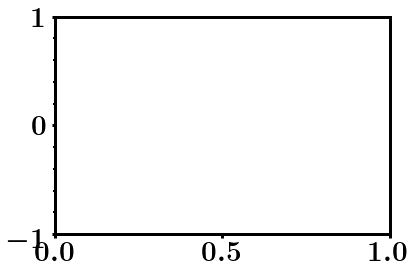

In [26]:
from matplotlib import animation, rc
from IPython.display import HTML

# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( 0, 1))
#ax.set_ylim((-10, 10))
ax.set_ylim((-1, 1))

line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

# animation function. This is called sequentially
def animate(i):
    #x = np.linspace(0, 2, 1000)
    #y = np.sin(2 * np.pi * (x - 0.01 * i))
    x = X
    y = v[:,10*i]
    line.set_data(x, y)
    return (line,)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)

#HTML(anim.to_html5_video())

rc('animation', html='html5')

In [27]:
anim